In [ ]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [1]:
import scanpy as sc
import pandas as pd
import scanpy as sc 
import sys 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


warnings.filterwarnings('ignore')
sys.path.append('../../src')

from spaceoracle.virtual_tissue import VirtualTissue

/ihome/djishnu/alw399/.local/lib/python3.9/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-08-11 14:31:47.062097: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ihome/crc/install/gcc-12.2.0/postgresql/15.2/lib:/ihome/crc/install/gcc-12.2.0/imagemagick/6.9.12/lib:/ihome/crc/install/gcc-12.2.0/geos/3.9.4/lib:/ihome/crc/install/gcc-12.2.0/zstd/zstd-1.5.5/lib:/ihome/crc/install/gcc-12.2.0/unixodbc/2.3.11/lib:/ihome/crc/install/sodium/1.0.18/lib:/ihome/crc/install/gcc-12.2.0/r/4.4.0/lib64/R/lib:/ihome/crc/install/gcc-12.2

In [2]:
plt.rcParams.update({
    "text.usetex": False,
    "svg.fonttype": 'none'
})

In [3]:
adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/slideseq_mouse_lymphnode.h5ad')
# adata = sc.read_h5ad('/Users/koush/Desktop/training_data/slideseq_mouse_lymphnode.h5ad')

In [5]:
%matplotlib inline

In [6]:
import json

with open('./colors.json', 'r') as f:
    color_dict = json.load(f)

In [7]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['figure.dpi'] = 100


In [8]:
covet = VirtualTissue(
    adata = adata,
    annot = 'cell_type',
    betadatas_path = '/ix/djishnu/shared/djishnu_kor11/covet_runs/mouse_lymphnode_slideseq',
    ko_path = '/ix/djishnu/shared/djishnu_kor11/genome_screens/mouse_lymphnode_slideseq_COVET',
    color_dict=color_dict
)


In [9]:
ligands = ['Il2', 'Il15', 'Il4', 'Cxcl13', 'Ccl5', 'Lgals9']
receptors = ['Il2ra', 'Cxcr4', 'Ccr4', 'Il4ra', 'Il6st', 'Cxcr5']
tf = ['Gata3', 'Prdm1', 'Pax5', 'Foxp3', 'Bcl6', 'Stat4']
randoms = ['Gata3', 'Cux2', 'Pten', 'Fosl2', 'Zkscan3', 'Tfcp2']

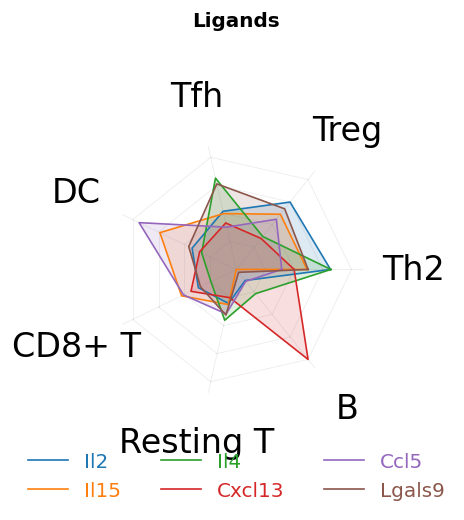

In [10]:
covet.plot_radar(genes=ligands, 
    cache_path='../../notebooks/mouse_lymphnode_slideseq/COVET', 
    figsize=(10, 4),
    dpi=120,
)
plt.title('Ligands\n\n', fontweight='bold')
plt.savefig('./figures/spider_plot_ligands_COVET.svg', dpi=300, bbox_inches='tight', format='svg')
plt.show()

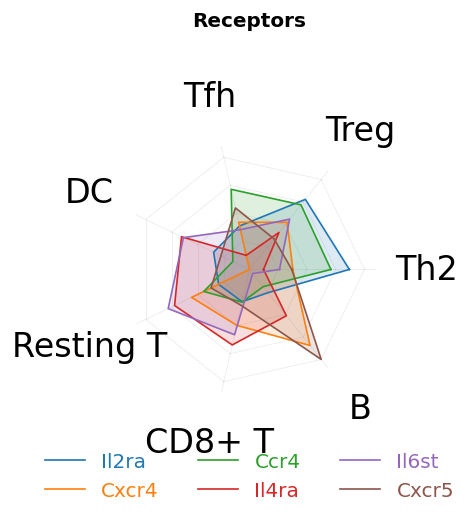

In [12]:
covet.plot_radar(genes=receptors, 
    cache_path='../../notebooks/mouse_lymphnode_slideseq/COVET', 
    figsize=(10, 4),
    dpi=120,
)
plt.title('Receptors\n\n', fontweight='bold')
plt.savefig('./figures/spider_plot_receptors_COVET.svg', dpi=300, bbox_inches='tight', format='svg')
plt.show()

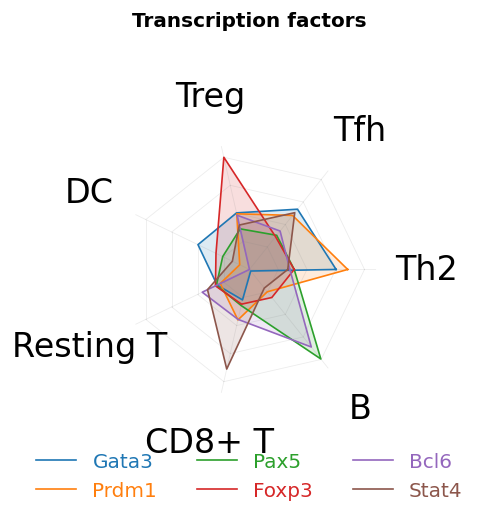

In [13]:
covet.plot_radar(genes=tf, 
    cache_path='../../notebooks/mouse_lymphnode_slideseq/COVET', 
    figsize=(10, 4),
    dpi=120,
)
plt.title('Transcription factors\n\n', fontweight='bold')
plt.savefig('./figures/spider_plot_tf_COVET.svg', dpi=300, bbox_inches='tight', format='svg')
plt.show()